# Hands-on 1 Tutorial: Clasificador Lineal - Perceptrón
- **Autor:** Angel Parada Perez
- **Fecha** 8 de Noviembre del 2025


## 1.1 Fundamentos de la técnica
El Perceptrón es el modelo más básico de una red neuronal artificial. Fue propuesto por Frank Rosenblatt (1958) como un algoritmo de clasificación supervisada que intenta encontrar un hiperplano lineal que separe dos clases de datos.

Su funcionamiento se basa en combinar las entradas (features) con pesos ajustables, y aplicar una función de activación (por ejemplo, la función escalón) para decidir a qué clase pertenece un patrón.

En términos simples:
- Si el resultado ponderado de las entradas supera un umbral → salida = 1
- Si no lo supera → salida = 0

Este algoritmo aprende iterativamente, ajustando los pesos para minimizar los errores de clasificación.

## 1.2. Modelo Matemático del Perceptrón
El modelo del Perceptrón se representa como:

$$ y = f(w \cdot x + b) $$

Donde:

- **$ x = [x_1, x_2, ..., x_n] $**: vector de características de entrada.
- **$ w = [w_1, w_2, ..., w_n] $**: vector de pesos sinápticos.
- **$ b $**: sesgo (bias).
- **$ f() $**: función de activación (en el Perceptrón, es una función escalón).
- **$ y $**: salida (0 o 1).

**Regla de aprendizaje:**

$$ w_i(t+1) = w_i(t) + \eta \cdot (y_{real} - y_{pred}) \cdot x_i $$

Donde **$ \eta $** es la tasa de aprendizaje (learning rate).

## 1.3. Descripción de la librería y funciones usadas
- **numpy:** para operaciones matemáticas y manejo de arreglos.
- **matplotlib:** para visualización de datos.
- **scikit-learn (sklearn):**
  - `datasets`: para generar conjuntos de datos de prueba.
  - `model_selection.train_test_split`: para dividir los datos.
  - `linear_model.Perceptron`: implementación del algoritmo Perceptrón.
  - `metrics.accuracy_score`: para evaluar el desempeño del modelo.

##  1.4. Pipeline del Perceptrón
### 1.4.1 Feature Engineering

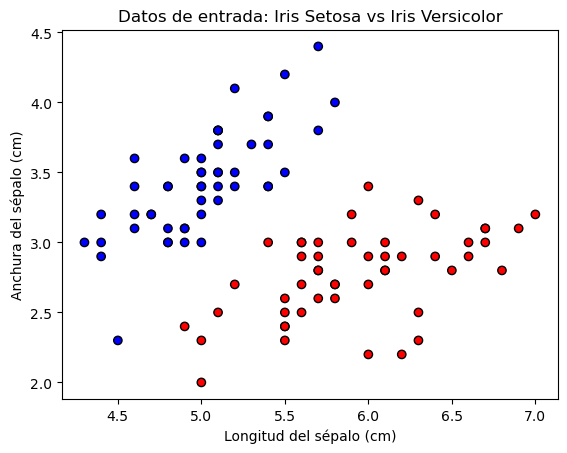

 Conjunto de datos: Iris Setosa (0) y Iris Versicolor (1)
 Variables de entrada: Longitud y anchura del sépalo


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Cargar dataset Iris
X, y = load_iris(return_X_y=True)

# 🔹 Filtrar solo las clases 0 (Setosa) y 1 (Versicolor)
X = X[y < 2]
y = y[y < 2]

# 🔹 Usar solo las dos primeras características (para visualización 2D)
X = X[:, :2]

# Visualización de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Datos de entrada: Iris Setosa vs Iris Versicolor")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Anchura del sépalo (cm)")
plt.show()

print(" Conjunto de datos: Iris Setosa (0) y Iris Versicolor (1)")
print(" Variables de entrada: Longitud y anchura del sépalo")



### 1.4.2 Model Selection
Opte por un clasificador lineal (Perceptrón) porque:
- El conjunto de datos es linealmente separable.
- Quiero un modelo simple e interpretable.
- El Perceptrón busca un hiperplano que divida las clases.
- Su aprendizaje es rápido y eficiente para datos de baja dimensión.

### 1.4.3 Model Training

In [3]:

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo
modelo = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
modelo.fit(X_train, y_train)

print(" Entrenamiento completado.")
print(f"Coeficientes (pesos): {modelo.coef_}")
print(f"Bias: {modelo.intercept_}")


 Entrenamiento completado.
Coeficientes (pesos): [[ 2.63 -4.39]]
Bias: [-0.9]


### 1.4.4 Prediction

In [45]:

# Función para probar patrones
def probar_patron(modelo, X):
    pred = modelo.predict([X])[0]
    print(f"Entrada: {X} → Clase predicha: {pred}")
    return pred

# Pruebas
print("\n Pruebas de patrones individuales:")
probar_patron(modelo, X_test[0])
probar_patron(modelo, X_test[1])
probar_patron(modelo, X_test[2])



 Pruebas de patrones individuales:
Entrada: [6.  2.7] → Clase predicha: 1
Entrada: [5.5 2.3] → Clase predicha: 1
Entrada: [5.9 3.2] → Clase predicha: 1


np.int64(1)

### 1.4.5 Model Evaluation


 Precisión del modelo (Accuracy): 100.00%


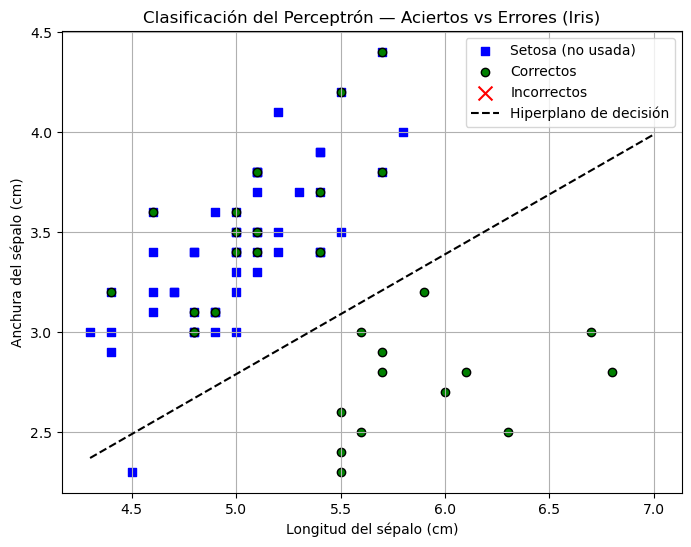

In [6]:
# Recalcular accuracy
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Precisión del modelo (Accuracy): {accuracy * 100:.2f}%")

# Identificar aciertos y errores
correctos = y_pred == y_test
incorrectos = ~correctos

# Cargar todo el dataset para visualizar las tres clases
X_all, y_all = load_iris(return_X_y=True)
X_all = X_all[:, :2]

# Gráfica
plt.figure(figsize=(8,6))

# Mostrar Setosa (solo como referencia, no usada en el entrenamiento)
mask_setosa = y_all == 0
plt.scatter(X_all[mask_setosa, 0], X_all[mask_setosa, 1],
            c='blue', marker='s', label='Setosa (no usada)')

# Puntos correctamente clasificados
plt.scatter(X_test[correctos, 0], X_test[correctos, 1],
            c='green', marker='o', edgecolor='k', label='Correctos')

# Puntos mal clasificados
plt.scatter(X_test[incorrectos, 0], X_test[incorrectos, 1],
            c='red', marker='x', s=100, label='Incorrectos')

# Hiperplano de decisión
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(modelo.coef_[0][0] * x_vals + modelo.intercept_[0]) / modelo.coef_[0][1]
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano de decisión')

# Detalles del gráfico
plt.title("Clasificación del Perceptrón — Aciertos vs Errores (Iris)")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Anchura del sépalo (cm)")
plt.legend()
plt.grid(True)
plt.show()


## Referencias bibliográficas
- 13. Perceptron class in sklearn. (s/f). Python-Course.Eu. Recuperado el 5 de noviembre de 2025, de https://python-course.eu/machine-learning/perceptron-class-in-sklearn.php

- Daniel. (2022, marzo 7). Perceptrón: ¿qué es y para qué sirve? DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

- El Perceptrón de Scikit-learn. (s/f). Interactivechaos.com. Recuperado el 5 de noviembre de 2025, de https://interactivechaos.com/es/manual/tutorial-de-machine-learning/el-perceptron-de-scikit-learn

- Garau, G. (2021, marzo 31). Perceptrón Simple: Definición y Propiedades - Damavis Blog. Damavis Blog - Data - Machine Learning - Visualization. https://blog.damavis.com/perceptron-simple-definicion-matematica-y-propiedades/

- OMES [@OMES-va]. (s/f). Perceptrón en Python: Clasifica Iris Setosa y Versicolor con Scikit-learn 🤖🧠 [[Object Object]]. Youtube. Recuperado el 5 de noviembre de 2025, de https://www.youtube.com/watch?v=h1ae43Z6uIE